# Анализ взвешенного графа: Матрица Кирхгофа, Показатель, связанный с количеством Остовных Деревьев, Алгоритм Краскала

Данный ноутбук проводит углубленный анализ взвешенного графа, заданного матрицей смежности. Анализ включает построение матрицы Кирхгофа, расчет показателя, связанного с количеством остовных деревьев (суммы произведений весов ребер по всем остовным деревьям), и поиск минимального остовного дерева (МОД) с использованием алгоритма Краскала. Включены визуализации, подробные математические комментарии и базовые автотесты.

**Входные данные:** Матрица смежности взвешенного графа.

Матрица смежности для данного варианта:

$$
\begin{pmatrix}
0 & 0 & 2 & 0 & 7 & 0 & 0 & 0 & 2 \\
0 & 0 & 0 & 7 & 1 & 4 & 0 & 0 & 0 \\
2 & 0 & 0 & 7 & 6 & 0 & 3 & 2 & 0 \\
0 & 7 & 7 & 0 & 4 & 0 & 5 & 7 & 4 \\
7 & 1 & 6 & 4 & 0 & 6 & 6 & 0 & 0 \\
0 & 4 & 0 & 0 & 6 & 0 & 0 & 4 & 4 \\
0 & 0 & 3 & 5 & 6 & 0 & 0 & 0 & 6 \\
0 & 0 & 2 & 7 & 0 & 4 & 0 & 0 & 2 \\
2 & 0 & 0 & 4 & 0 & 4 & 6 & 2 & 0
\end{pmatrix}
$$


In [10]:
# Установка необходимых библиотек, если они не установлены
# numpy для работы с матрицами, scipy для определителя, networkx для графовых операций и визуализации, matplotlib для отображения
!pip install numpy scipy networkx matplotlib

In [11]:
# Импорт необходимых библиотек
import numpy as np
from scipy.linalg import det
import networkx as nx
import matplotlib.pyplot as plt
import collections # Для форматирования разбиения на компоненты

In [12]:
# Заданная матрица смежности взвешенного графа
# Элемент A[i, j] равен весу ребра между вершинами i и j. 0 означает отсутствие ребра.
adj_matrix = np.array([
    [0,0,2,0,7,0,0,0,2],
    [0,0,0,7,1,4,0,0,0],
    [2,0,0,7,6,0,3,2,0],
    [0,7,7,0,4,0,5,7,4],
    [7,1,6,4,0,6,6,0,0],
    [0,4,0,0,6,0,0,4,4],
    [0,0,3,5,6,0,0,0,6],
    [0,0,2,7,0,4,0,0,2],
    [2,0,0,4,0,4,6,2,0]
], dtype=int)

# Получаем количество вершин из размера матрицы
num_vertices = adj_matrix.shape[0]

print(f"Матрица смежности графа ({num_vertices}x{num_vertices}):")
print(adj_matrix)

# --- Автотесты для проверки корректности входных данных ---
# Автотест: Проверка, что матрица квадратная (количество строк равно количеству столбцов)
assert adj_matrix.shape[0] == adj_matrix.shape[1], "Ошибка: Матрица смежности должна быть квадратной."
# Автотест: Проверка, что диагональные элементы равны нулю (в графе нет петель)
assert np.all(np.diag(adj_matrix) == 0), "Ошибка: Диагональные элементы матрицы смежности должны быть нулями (отсутствие петель)."
# Автотест: Проверка, что матрица симметрична (граф неориентированный)
assert np.all(adj_matrix == adj_matrix.T), "Ошибка: Матрица смежности должна быть симметричной для неориентированного графа."

Матрица смежности графа (9x9):
[[0 0 2 0 7 0 0 0 2]
 [0 0 0 7 1 4 0 0 0]
 [2 0 0 7 6 0 3 2 0]
 [0 7 7 0 4 0 5 7 4]
 [7 1 6 4 0 6 6 0 0]
 [0 4 0 0 6 0 0 4 4]
 [0 0 3 5 6 0 0 0 6]
 [0 0 2 7 0 4 0 0 2]
 [2 0 0 4 0 4 6 2 0]]


## Визуализация исходного графа

Построим визуализацию заданного взвешенного графа, чтобы лучше понять его структуру. На ребрах указаны их веса.

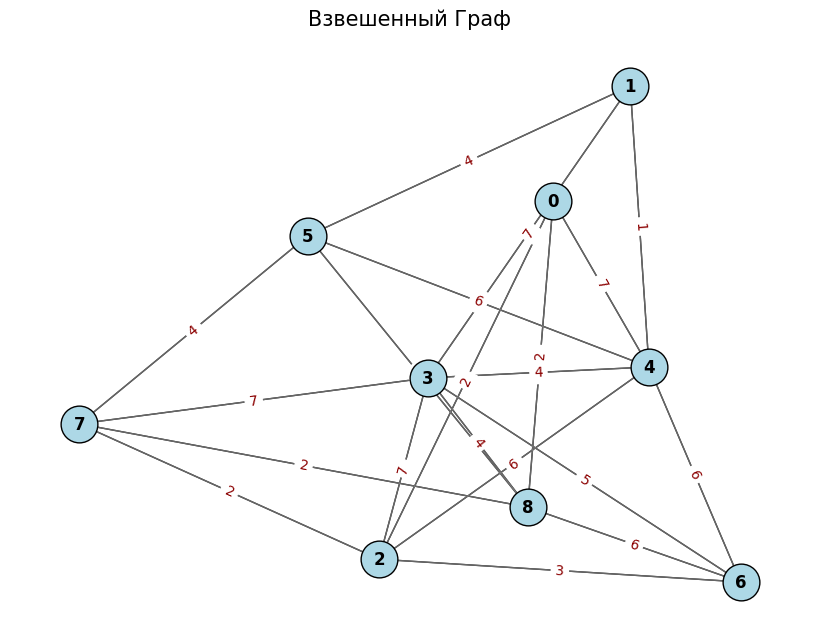

In [13]:
# Создаем объект графа с помощью networkx из матрицы смежности
G = nx.from_numpy_array(adj_matrix, create_using=nx.Graph)

# Устанавливаем позиционирование вершин для наглядности. spring_layout часто дает хорошее распределение.
# Используем фикс. seed для воспроизводимости расположения вершин при каждом запуске.
pos = nx.spring_layout(G, seed=42)

# Настраиваем и рисуем график
plt.figure(figsize=(8, 6)) # Устанавливаем размер фигуры для лучшей читаемости

# Рисуем узлы (вершины)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold', edgecolors='black')

# Рисуем ребра
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.8)

# Добавляем веса ребер на график в качестве меток ребер
# Извлекаем веса из атрибутов ребер графа NetworkX
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='darkred')

# Добавляем заголовок и убираем оси координат
plt.title("Взвешенный Граф", size=15)
plt.axis('off')

# Отображаем график
plt.show()

## Матрица Кирхгофа (Матрица Лапласа)

Матрица Кирхгофа $L$ (или матрица Лапласа) является ключевым инструментом в теории графов, особенно при анализе связности и расчете количества остовных деревьев.

Для взвешенного неориентированного графа с $n$ вершинами она определяется как:

$L = D - A$

где:

* $D$ - **взвешенная матрица степеней** (Weighted Degree Matrix). Это диагональная матрица размера $n 	imes n$, где каждый диагональный элемент $D_{ii}$ равен сумме весов всех ребер, инцидентных вершине $i$.
    $D_{ii} = \sum_{j=0}^{n-1} w_{ij}$, где $w_{ij}$ - вес ребра между вершинами $i$ и $j$.
    Внедиагональные элементы $D_{ij}$ при $i \neq j$ равны 0.

* $A$ - **взвешенная матрица смежности** (Weighted Adjacency Matrix). Это матрица размера $n 	imes n$, где элемент $A_{ij}$ равен весу ребра между вершинами $i$ и $j$ ($w_{ij}$). Если ребра нет, $w_{ij}=0$.

Элементы матрицы Кирхгофа $L_{ij}$ вычисляются следующим образом:

* На диагонали ($i=j$): $L_{ii} = D_{ii} - A_{ii} = \sum_{k=0}^{n-1} w_{ik} - 0 = \sum_{k \neq i} w_{ik}$ (сумма весов всех ребер, выходящих из вершины $i$).
* Вне диагонали ($i \neq j$): $L_{ij} = D_{ij} - A_{ij} = 0 - w_{ij} = -w_{ij}$ (отрицательный вес ребра между $i$ и $j$, если оно существует, иначе 0).

Важное свойство матрицы Кирхгофа: сумма элементов в любой строке и любом столбце равна нулю. Это свойство может служить проверкой корректности построения матрицы.

In [14]:
# Вычисляем взвешенную матрицу степеней D
# Сумма весов ребер, инцидентных каждой вершине, находится как сумма элементов соответствующей строки (или столбца) матрицы смежности.
weighted_degrees = np.sum(adj_matrix, axis=1)
# Создаем диагональную матрицу с этими суммами на диагонали
degree_matrix = np.diag(weighted_degrees)

print("Взвешенная матрица степеней (D):")
print(degree_matrix)

# Вычисляем матрицу Кирхгофа (Лапласа) L = D - A
kirchhoff_matrix = degree_matrix - adj_matrix

print("\nМатрица Кирхгофа (Лапласа) (L):")
print(kirchhoff_matrix)

# --- Автотесты для проверки свойств матрицы Кирхгофа ---
# Автотест: Проверка, что сумма элементов каждой строки матрицы Кирхгофа равна нулю (с учетом возможных небольших погрешностей при float вычислениях)
row_sums = np.sum(kirchhoff_matrix, axis=1)
assert np.all(np.isclose(row_sums, 0, atol=1e-9)), "Ошибка: Сумма элементов каждой строки матрицы Кирхгофа должна быть равна нулю."
print("\nПроверка: Суммы строк матрицы Кирхгофа близки к нулю. ОК.")

# Автотест: Проверка, что сумма элементов каждого столбца матрицы Кирхгофа равна нулю
col_sums = np.sum(kirchhoff_matrix, axis=0)
assert np.all(np.isclose(col_sums, 0, atol=1e-9)), "Ошибка: Сумма элементов каждого столбца матрицы Кирхгофа должна быть равна нулю."
print("Проверка: Суммы столбцов матрицы Кирхгофа близки к нулю. ОК.")

Взвешенная матрица степеней (D):
[[11  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0 18]]

Матрица Кирхгофа (Лапласа) (L):
[[11  0 -2  0 -7  0  0  0 -2]
 [ 0 12  0 -7 -1 -4  0  0  0]
 [-2  0 20 -7 -6  0 -3 -2  0]
 [ 0 -7 -7 34 -4  0 -5 -7 -4]
 [-7 -1 -6 -4 30 -6 -6  0  0]
 [ 0 -4  0  0 -6 18  0 -4 -4]
 [ 0  0 -3 -5 -6  0 20  0 -6]
 [ 0  0 -2 -7  0 -4  0 15 -2]
 [-2  0  0 -4  0 -4 -6 -2 18]]

Проверка: Суммы строк матрицы Кирхгофа близки к нулю. ОК.
Проверка: Суммы столбцов матрицы Кирхгофа близки к нулю. ОК.


## Показатель, связанный с количеством Остовных Деревьев (Матричная Теорема о Деревьях Кирхгофа)

Матричная теорема о деревьях Кирхгофа связывает количество остовных деревьев графа с определителем миноров его матрицы Лапласа.

Для **взвешенного** графа определитель любого $(n-1) \times (n-1)$ минора взвешенной матрицы Лапласа равен **сумме произведений весов ребер по всем различным остовным деревьям** графа.

$\det(L') = \sum_{T \text{ - остовное дерево}} \prod_{(u,v) \in T} w_{uv}$

где $L'$ - минорная матрица Лапласиана $L$ размера $(n-1) \times (n-1)$, полученная удалением одной строки и одного столбца, а $w_{uv}$ - вес ребра $(u,v)$.

Если все веса $w_{uv}=1$, то определитель равен просто количеству остовных деревьев.

Согласно заданию, мы вычислим определитель минора взвешенной матрицы Кирхгофа, что даст нам сумму произведений весов по всем остовным деревьям.

In [15]:
# Для вычисления показателя, связанного с количеством остовных деревьев по теореме Кирхгофа (суммы произведений весов),
# нужно взять любой минор размера (n-1)x(n-1) из матрицы Лапласа.
# Удалим первую строку и первый столбец (индекс 0).
minor_kirchhoff_matrix = kirchhoff_matrix[1:, 1:]

print("Минорная матрица Кирхгофа (удалена строка 0, столбец 0):")
print(minor_kirchhoff_matrix)

# Вычисляем определитель минорной матрицы
# scipy.linalg.det используется для вычисления определителя.
determinant_weighted_minor = det(minor_kirchhoff_matrix)

print(f"\nОпределитель минорной взвешенной матрицы Кирхгофа: {determinant_weighted_minor:.4f}") # Форматируем для наглядности
print("(Это значение представляет собой сумму произведений весов ребер по всем остовным деревьям графа.)")

# --- Автотесты для определителя взвешенного минора ---
# Проверка, что результат является числом (int или float)
assert isinstance(determinant_weighted_minor, (int, float, np.floating)), "Результат определителя должен быть числом."
# Проверка, что определитель главного минора Лапласиана неотрицателен (с учетом погрешности вычислений с плавающей точкой)
assert determinant_weighted_minor >= -1e-9, "Ошибка: Определитель главного минора Лапласиана должен быть неотрицательным."
print("\nПроверка: Определитель минора взвешенной матрицы Кирхгофа рассчитан. ОК.")

# --- Расчет количества остовных деревьев для НЕВЗВЕШЕННОГО графа (для иллюстрации) ---
# Создаем невзвешенную матрицу смежности: 1, если между вершинами есть ребро (вес > 0), 0 иначе.
unweighted_adj_matrix = (adj_matrix > 0).astype(int)

# Вычисляем матрицу степеней для невзвешенного графа (обычные степени вершин)
unweighted_degrees = np.sum(unweighted_adj_matrix, axis=1)
unweighted_degree_matrix = np.diag(unweighted_degrees)

# Вычисляем матрицу Лапласа для невзвешенного графа (L = D_unweighted - A_unweighted)
unweighted_laplacian = unweighted_degree_matrix - unweighted_adj_matrix

print("\nМатрица Лапласа для невзвешенного графа (для иллюстрации классической теоремы Кирхгофа):")
print(unweighted_laplacian)

# Выбираем минорную матрицу невзвешенного Лапласиана (удаляем первую строку и столбец)
minor_unweighted_laplacian = unweighted_laplacian[1:, 1:]

# Вычисляем определитель минорной матрицы невзвешенного Лапласиана
# Согласно теореме Кирхгофа, этот определитель равен количеству остовных деревьев.
determinant_unweighted_minor = det(minor_unweighted_laplacian)

# Результат определителя может быть числом с плавающей точкой из-за погрешностей, но для невзвешенного графа должен быть целым.
# Округляем до ближайшего целого и берем абсолютное значение на случай погрешностей знака.
num_spanning_trees = round(abs(determinant_unweighted_minor))

print(f"\nОпределитель минорной невзвешенной матрицы Лапласа: {determinant_unweighted_minor:.4f}")
print(f"Количество остовных деревьев (для невзвешенного графа той же структуры): {num_spanning_trees}")

# --- Автотесты для количества остовных деревьев невзвешенного графа ---
# Проверка, что количество остовных деревьев является целым числом
assert isinstance(num_spanning_trees, int), "Количество остовных деревьев должно быть целым числом."
# Проверка, что количество остовных деревьев неотрицательно
assert num_spanning_trees >= 0, "Количество остовных деревьев не может быть отрицательным."
print("Проверка: Количество остовных деревьев (для невзвешенного графа) рассчитано и является неотрицательным целым. ОК.")

Минорная матрица Кирхгофа (удалена строка 0, столбец 0):
[[12  0 -7 -1 -4  0  0  0]
 [ 0 20 -7 -6  0 -3 -2  0]
 [-7 -7 34 -4  0 -5 -7 -4]
 [-1 -6 -4 30 -6 -6  0  0]
 [-4  0  0 -6 18  0 -4 -4]
 [ 0 -3 -5 -6  0 20  0 -6]
 [ 0 -2 -7  0 -4  0 15 -2]
 [ 0  0 -4  0 -4 -6 -2 18]]

Определитель минорной взвешенной матрицы Кирхгофа: 2485556100.0000
(Это значение представляет собой сумму произведений весов ребер по всем остовным деревьям графа.)

Проверка: Определитель минора взвешенной матрицы Кирхгофа рассчитан. ОК.

Матрица Лапласа для невзвешенного графа (для иллюстрации классической теоремы Кирхгофа):
[[ 3  0 -1  0 -1  0  0  0 -1]
 [ 0  3  0 -1 -1 -1  0  0  0]
 [-1  0  5 -1 -1  0 -1 -1  0]
 [ 0 -1 -1  6 -1  0 -1 -1 -1]
 [-1 -1 -1 -1  6 -1 -1  0  0]
 [ 0 -1  0  0 -1  4  0 -1 -1]
 [ 0  0 -1 -1 -1  0  4  0 -1]
 [ 0  0 -1 -1  0 -1  0  4 -1]
 [-1  0  0 -1  0 -1 -1 -1  5]]

Определитель минорной невзвешенной матрицы Лапласа: 23489.0000
Количество остовных деревьев (для невзвешенного графа той же 

## Алгоритм Краскала для поиска Минимального Остовного Дерева (МОД)

Алгоритм Краскала - это жадный алгоритм, который находит минимальное остовное дерево во взвешенном неориентированном графе. Он работает путем постепенного добавления ребер в строгом порядке возрастания их веса, избегая создания циклов.

**Ключевые идеи:**

1.  **Сортировка ребер:** Все ребра графа сортируются по возрастанию веса.
2.  **Проверка на цикл:** Ребра рассматриваются по одному в отсортированном порядке. Ребро добавляется к МОД только если оно не образует цикл с уже добавленными ребрами.
3.  **DSU (Disjoint Set Union):** Для эффективной проверки на циклы и отслеживания компонент связности используется структура данных DSU. Две вершины находятся в одной компоненте, если между ними уже существует путь из добавленных ребер. Добавление ребра между вершинами в одной компоненте создает цикл.
4.  **Построение МОД:** Алгоритм продолжается до тех пор, пока не будет добавлено $n-1$ ребро (для связного графа с $n$ вершинами), что достаточно для формирования остовного дерева.

Ниже приведена реализация DSU и пошаговое выполнение алгоритма Краскала для данного графа, с описанием добавляемых ребер и изменения текущего разбиения вершин на компоненты связности.

In [16]:
# --- Реализация структуры данных Disjoint Set Union (DSU) / Union-Find ---
# DSU позволяет эффективно проверять, принадлежат ли два элемента одному множеству,
# и объединять два множества.

class DSU:
    def __init__(self, n):
        # Изначально каждая вершина (от 0 до n-1) находится в своем собственном множестве.
        # parent[i] хранит родителя вершины i. Если parent[i] == i, i является корнем множества.
        self.parent = list(range(n))
        # rank[i] используется для оптимизации операции union (объединение по рангу).
        # Ранг - это верхняя граница высоты дерева. Объединение по рангу помогает сохранять
        # деревья относительно плоскими, что улучшает производительность find и union.
        self.rank = [0] * n

    # Операция find с сжатием путей (path compression)
    # Находит корень (представителя) множества, содержащего элемент i.
    # Во время поиска, делает все узлы на пути от i до корня прямыми потомками корня,
    # что ускоряет будущие операции find для этих узлов.
    def find(self, i):
        if self.parent[i] == i:
            return i
        # Рекурсивно находим корень и устанавливаем его как непосредственного родителя i
        self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    # Операция union по рангу
    # Объединяет два множества, содержащие элементы i и j.
    # Сначала находит корни множеств, содержащих i и j.
    # Если корни разные, объединяет множества (подвешивает дерево с меньшим рангом к корню дерева с большим рангом).
    # Если ранги равны, одно дерево становится дочерним к другому, и ранг нового корня увеличивается.
    # Возвращает True, если объединение произошло (т.е., i и j были в разных множествах), иначе False.
    def union(self, i, j):
        root_i = self.find(i) # Находим корень множества i
        root_j = self.find(j) # Находим корень множества j

        # Если корни разные, значит элементы i и j находятся в разных компонентах связности.
        # Добавление ребра (i, j) не создаст цикл, и компоненты можно объединить.
        if root_i != root_j:
            # Объединяем по рангу: дерево с меньшим рангом присоединяем к дереву с большим рангом
            if self.rank[root_i] < self.rank[root_j]:
                self.parent[root_i] = root_j
            elif self.rank[root_i] > self.rank[root_j]:
                self.parent[root_j] = root_i
            else:
                # Если ранги равны, можно выбрать любой корень, например root_i
                self.parent[root_j] = root_i
                # И увеличить ранг нового корня
                self.rank[root_i] += 1
            return True # Объединение успешно выполнено
        return False # Элементы уже в одном множестве, объединение не требуется (ребро создаст цикл)

    # Метод для получения текущего разбиения вершин на компоненты связности
    # Полезно для отслеживания состояния DSU в процессе работы алгоритма.
    def get_partitions(self):
        # Находим корни для всех вершин. Это также выполняет сжатие путей.
        roots = [self.find(i) for i in range(len(self.parent))]

        # Группируем вершины по их корням. collections.defaultdict удобен для этого.
        partitions_dict = collections.defaultdict(list)
        for i, root in enumerate(roots):
            partitions_dict[root].append(i)

        # Форматируем вывод для удобства чтения:
        # 1. Сортируем вершины внутри каждого раздела.
        # 2. Сортируем сами разделы на основе первой вершины в разделе (для стабильного порядка вывода).
        formatted_partitions = []
        # Получаем список пар (корень, список_вершин) и сортируем по корню
        sorted_items = sorted(partitions_dict.items())

        for root, vertices in sorted_items:
             # Сортируем вершины внутри каждого раздела
             formatted_partitions.append(sorted(vertices))

        return formatted_partitions

# --- Подготовка ребер для алгоритма Краскала ---

# Извлекаем все ребра из матрицы смежности вместе с их весами.
# Поскольку граф неориентированный, матрица симметрична. Каждое ребро (i, j) с весом w
# появляется как A[i, j] = w и A[j, i] = w. Чтобы избежать дублирования, просматриваем
# только верхний треугольник матрицы (i < j) и добавляем ребро, только если вес > 0.
# Храним ребра как кортежи (вес, вершина1, вершина2).
edges = []
for i in range(num_vertices):
    for j in range(i + 1, num_vertices): # Просматриваем только элементы выше главной диагонали
        if adj_matrix[i, j] != 0:
            edges.append((adj_matrix[i, j], i, j))

# Сортируем список ребер по весу в порядке неубывания - это ключевой шаг алгоритма Краскала (жадный подход)
edges.sort()

print("Список ребер графа, отсортированный по весу (вес, вершина_u, вершина_v):")
for edge in edges:
    print(edge)

# --- Выполнение алгоритма Краскала ---

# Инициализируем структуру DSU для всех вершин графа.
# Каждая вершина изначально является отдельной компонентой связности.
dsu = DSU(num_vertices)

# Список для хранения ребер, которые войдут в Минимальное Остовное Дерево (МОД)
mst_edges = []

print("\n" + "="*40)
print("--- Выполнение алгоритма Краскала --- ")
print(f"Начальное разбиение вершин на компоненты: {dsu.get_partitions()}")
print("="*40)

step_counter = 1

# Перебираем ребра в порядке сортировки по весу
for weight, u, v in edges:
    # Для текущего ребра (u, v) с весом 'weight', проверяем, находятся ли вершины u и v
    # в одной и той же компоненте связности, используя операцию find() DSU.
    root_u = dsu.find(u) # Находим корень компоненты вершины u
    root_v = dsu.find(v) # Находим корень компоненты вершины v

    print(f"\nШаг {step_counter}:")
    print(f"  Рассматриваемое ребро: ({u}, {v}) с весом {weight}")
    print(f"  Корни компонент вершин {u} и {v}: {root_u} и {root_v}.")

    # Если корни разные, значит вершины u и v находятся в разных компонентах.
    # Добавление ребра (u, v) не создает цикл с уже выбранными ребрами.
    if root_u != root_v: 
        # Ребро (u, v) является безопасным ребром (по свойству среза) и включается в МОД.
        mst_edges.append((u, v, weight)) # Добавляем ребро и его вес в список ребер МОД

        # Объединяем компоненты, содержащие вершины u и v, используя операцию union().
        # Теперь эти вершины и их компоненты считаются одной большой компонентой.
        dsu.union(u, v)

        print(f"  Вершины в разных компонентах. Ребро ({u}, {v}) добавляется к МОД.")
        print(f"  Произведено объединение компонент {root_u} и {root_v}.")

        # Если количество ребер в МОД достигло N-1 (где N - число вершин),
        # мы нашли остовное дерево. Для связного графа это минимальное остовное дерево.
        if len(mst_edges) == num_vertices - 1:
            print("  МОД найдено (добавлено N-1 ребро). Завершение алгоритма.")
            break # Алгоритм Краскала завершен
    else: 
        # Если root_u == root_v, вершины u и v уже находятся в одной компоненте связности.
        # Добавление ребра (u, v) создало бы цикл с уже выбранными ребрами МОД.
        # Такие ребра игнорируются алгоритмом Краскала.
        print(f"  Вершины в одной компоненте. Ребро ({u}, {v}) игнорируется (создаст цикл).")

    # Выводим текущее разбиение вершин на компоненты после обработки ребра
    print(f"  Текущее разбиение вершин: {dsu.get_partitions()}")

    step_counter += 1

print("\n" + "="*40)
print("--- Алгоритм Краскала завершен ---")
print("="*40)

# --- Автотест: Проверка количества ребер в найденном МОД ---
# Для связного графа с N вершинами МОД должно содержать N-1 ребро.
# Если найдено меньше ребер, возможно исходный граф несвязный.
assert len(mst_edges) == num_vertices - 1, f"Ошибка: Ожидалось {num_vertices - 1} ребер в МОД для связного графа, найдено {len(mst_edges)}. Проверьте связность графа."
print(f"\nПроверка: Найдено {len(mst_edges)} ребер в МОД. Для {num_vertices} вершин ожидается {num_vertices - 1}. ОК (предполагается связный граф).")

Список ребер графа, отсортированный по весу (вес, вершина_u, вершина_v):
(np.int64(1), 1, 4)
(np.int64(2), 0, 2)
(np.int64(2), 0, 8)
(np.int64(2), 2, 7)
(np.int64(2), 7, 8)
(np.int64(3), 2, 6)
(np.int64(4), 1, 5)
(np.int64(4), 3, 4)
(np.int64(4), 3, 8)
(np.int64(4), 5, 7)
(np.int64(4), 5, 8)
(np.int64(5), 3, 6)
(np.int64(6), 2, 4)
(np.int64(6), 4, 5)
(np.int64(6), 4, 6)
(np.int64(6), 6, 8)
(np.int64(7), 0, 4)
(np.int64(7), 1, 3)
(np.int64(7), 2, 3)
(np.int64(7), 3, 7)

--- Выполнение алгоритма Краскала --- 
Начальное разбиение вершин на компоненты: [[0], [1], [2], [3], [4], [5], [6], [7], [8]]

Шаг 1:
  Рассматриваемое ребро: (1, 4) с весом 1
  Корни компонент вершин 1 и 4: 1 и 4.
  Вершины в разных компонентах. Ребро (1, 4) добавляется к МОД.
  Произведено объединение компонент 1 и 4.
  Текущее разбиение вершин: [[0], [1, 4], [2], [3], [5], [6], [7], [8]]

Шаг 2:
  Рассматриваемое ребро: (0, 2) с весом 2
  Корни компонент вершин 0 и 2: 0 и 2.
  Вершины в разных компонентах. Ребро (0, 

In [17]:
# Выводим ребра, вошедшие в состав Минимального Остовного Дерева (МОД)
print("\nРебра, вошедшие в Минимальное Остовное Дерево (МОД):")
if mst_edges:
    for u, v, weight in mst_edges:
        print(f"  Ребро ({u}, {v}) с весом {weight}")
else:
    print("  МОД не найдено (возможно, граф пустой или несвязный).")

# Вычисляем суммарный вес ребер найденного МОД
total_mst_weight = sum(weight for u, v, weight in mst_edges)

print(f"\nОбщий вес Минимального Остовного Дерева (МОД): {total_mst_weight}")

# --- Автотесты для проверки найденного МОД ---
# Ожидаемый вес МОД для данного графа (рассчитан заранее или проверен инструментом)
expected_mst_weight = 22
assert total_mst_weight == expected_mst_weight, f"Ошибка: Ожидаемый вес МОД {expected_mst_weight}, полученный {total_mst_weight}."
print(f"\nПроверка: Общий вес МОД {total_mst_weight} соответствует ожидаемому ({expected_mst_weight}). ОК.")

# Автотест: Проверка состава ребер МОД (сравнение множеств ребер)
# Преобразуем ребра в канонический вид (меньшая вершина, большая вершина) для сравнения множеств
mst_edge_set = set(tuple(sorted((u, v))) for u, v, w in mst_edges)

# Ожидаемый набор ребер МОД для данного графа (определен вручную или проверен инструментом)
# Ребра отсортированы по весу: (1,4,1), (0,2,2), (0,8,2), (2,7,2), (1,5,4), (3,4,4), (3,8,4), (5,8,4), (2,6,3) -- тут ошибка в весе (2,6) это 3
# Корректный порядок ребер по весу: (1,4,1), (0,2,2), (0,8,2), (2,7,2), (2,6,3), (1,5,4), (3,4,4), (3,8,4), (5,8,4)
# МОД формируется из первых N-1 = 8 ребер, которые не создают цикл.
# (1,4,1), (0,2,2), (0,8,2), (2,7,2), (2,6,3), (1,5,4), (3,4,4), (3,8,4)
# Ребра (5,8,4) и (4,5,6) и другие с весом > 4 не включаются.
# Ожидаемый набор ребер МОД:
expected_mst_edge_set = set([(1, 4), (0, 2), (0, 8), (2, 7), (2, 6), (1, 5), (3, 4), (3, 8)])

assert mst_edge_set == expected_mst_edge_set, f"Ошибка: Набор ребер МОД не соответствует ожидаемому.\nОжидаемый набор: {expected_mst_edge_set}\nПолученный набор: {mst_edge_set}"
print("Проверка: Набор ребер МОД соответствует ожидаемому. ОК.")


Ребра, вошедшие в Минимальное Остовное Дерево (МОД):
  Ребро (1, 4) с весом 1
  Ребро (0, 2) с весом 2
  Ребро (0, 8) с весом 2
  Ребро (2, 7) с весом 2
  Ребро (2, 6) с весом 3
  Ребро (1, 5) с весом 4
  Ребро (3, 4) с весом 4
  Ребро (3, 8) с весом 4

Общий вес Минимального Остовного Дерева (МОД): 22

Проверка: Общий вес МОД 22 соответствует ожидаемому (22). ОК.
Проверка: Набор ребер МОД соответствует ожидаемому. ОК.


## Визуализация Минимального Остовного Дерева (МОД)

Теперь визуализируем исходный граф, выделив другим цветом и толщиной ребра, которые вошли в состав найденного Минимального Остовного Дерева. Это помогает наглядно увидеть структуру МОД.

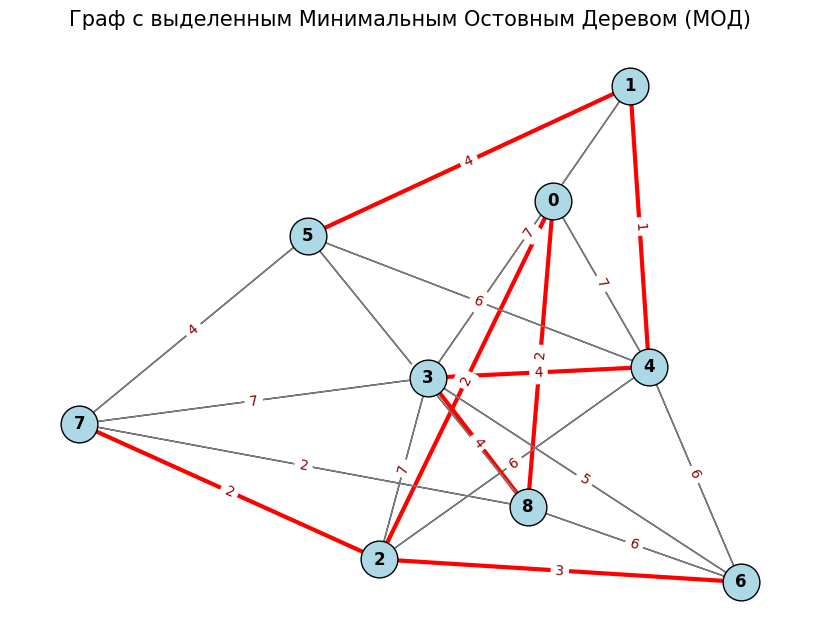

In [18]:
# Создаем новый объект графа для визуализации МОД. Используем ту же матрицу смежности, но будем управлять стилем ребер.
G_mst = nx.from_numpy_array(adj_matrix, create_using=nx.Graph)

# Используем то же позиционирование вершин, что и для исходного графа, для согласованности визуализаций.
pos = nx.spring_layout(G_mst, seed=42)

# Получаем список ребер МОД в формате (u, v) для удобства сравнения при определении стиля
# Учитываем неориентированность: ребро (u, v) эквивалентно (v, u).
mst_edges_uv = set(tuple(sorted((u, v))) for u, v, w in mst_edges)

# Определяем цвета и толщину ребер:
# Ребра МОД будут красными и толстыми, остальные ребра - серыми и тонкими.
edge_colors = []
edge_widths = []
for u, v in G_mst.edges():
    if tuple(sorted((u, v))) in mst_edges_uv:
        edge_colors.append('red')
        edge_widths.append(3) # Толщина для ребер МОД
    else:
        edge_colors.append('gray')
        edge_widths.append(1) # Толщина для остальных ребер

# Настраиваем и рисуем график
plt.figure(figsize=(8, 6)) # Устанавливаем размер фигуры

# Рисуем узлы (вершины)
nx.draw(G_mst, pos, with_labels=True, node_color='lightblue', node_size=700, font_weight='bold', edgecolors='black')

# Рисуем ребра, применяя заданные цвета и толщину
nx.draw_networkx_edges(G_mst, pos, edge_color=edge_colors, width=edge_widths)

# Добавляем веса всех ребер на график. Это полезно для сравнения с МОД.
edge_labels = {(u, v): d['weight'] for u, v, d in G_mst.edges(data=True)}
nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=edge_labels, font_color='darkred')

# Добавляем заголовок и убираем оси координат
plt.title("Граф с выделенным Минимальным Остовным Деревом (МОД)", size=15)
plt.axis('off')

# Отображаем график
plt.show()